<a href="https://colab.research.google.com/github/SantanaLucas1234/Logica-Fuzzy/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install scikit-fuzzy

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



# Fator de Serviço

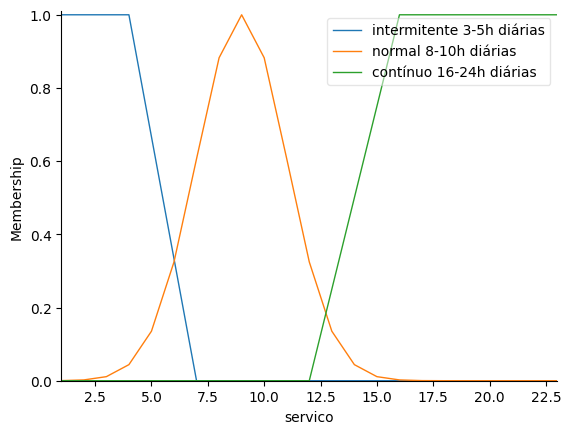

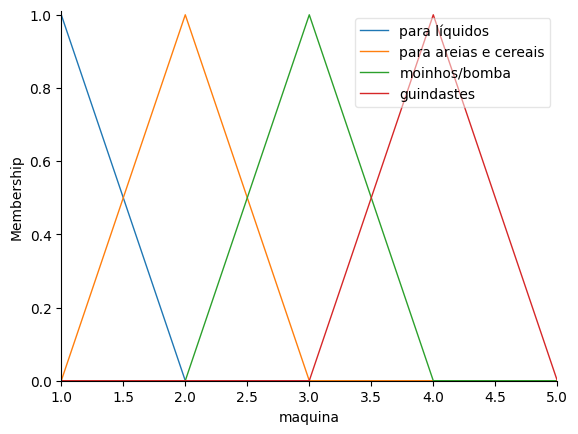

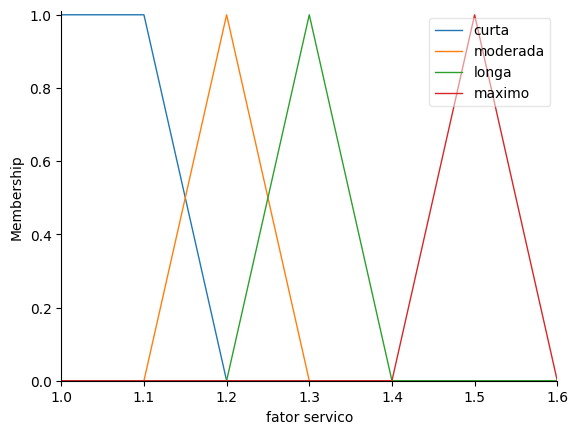

In [10]:
# Criando as variáveis do problema
servico = ctrl.Antecedent(np.arange(1, 24, 1), 'servico')
maquina = ctrl.Antecedent(np.arange(1, 6, 1), 'maquina')
fatorServico = ctrl.Consequent(np.arange(1, 1.7, 0.1), 'fator servico')

# Criando as funções de pertinência para o serviço
servico['intermitente 3-5h diárias'] = fuzz.trapmf(servico.universe, [0, 0, 4, 7])
servico['normal 8-10h diárias'] = fuzz.gaussmf(servico.universe, 9, 2)
servico['contínuo 16-24h diárias'] = fuzz.trapmf(servico.universe, [12,16,24,24 ])

# Criando as funções de pertinência para a maquina
maquina['para líquidos'] = fuzz.trapmf(maquina.universe, [0, 0, 1, 2])
maquina['para areias e cereais'] = fuzz.trimf(maquina.universe, [1, 2, 3])
maquina['moinhos/bomba'] = fuzz.trimf(maquina.universe, [2, 3, 4])
maquina['guindastes'] = fuzz.trimf(maquina.universe, [3, 4, 5])

# Criando as funções de pertinência para validade
fatorServico['curta'] = fuzz.trapmf(fatorServico.universe, [0, 0, 1.1, 1.2])
fatorServico['moderada'] = fuzz.trimf(fatorServico.universe, [1.1, 1.2, 1.3])
fatorServico['longa'] = fuzz.trapmf(fatorServico.universe, [1.2, 1.3, 1.4, 1.4])
fatorServico['maximo'] = fuzz.trimf(fatorServico.universe, [1.475, 1.5, 1.6])


servico.view()
maquina.view()
fatorServico.view()

Digite o tempo do serviço (H): 12
Digite o nº do máquinario: 3
O fator é de 1.200000 


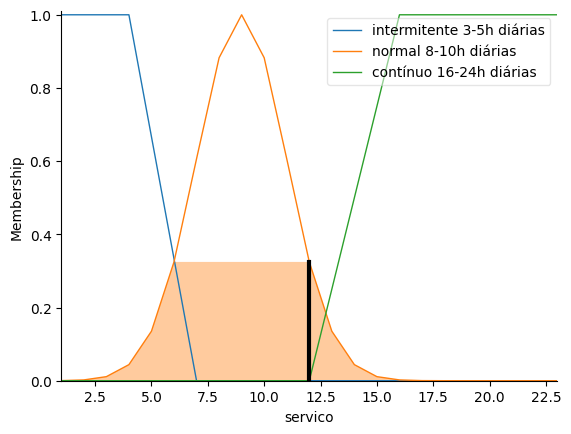

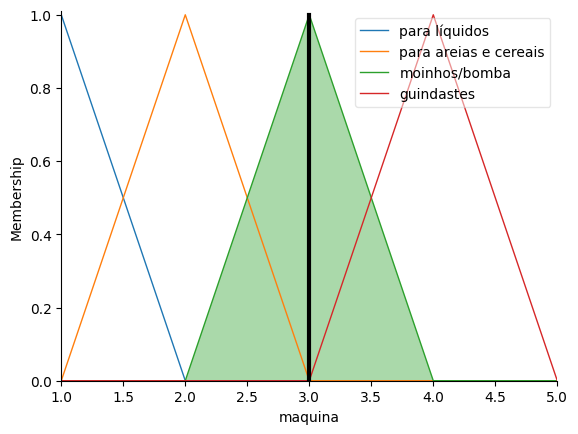

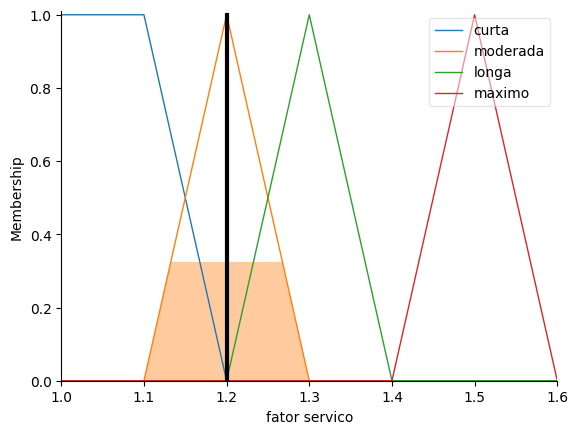

In [11]:
# Base de Regras
rule1 = ctrl.Rule(servico['intermitente 3-5h diárias'] & maquina['para líquidos'], fatorServico['curta'])
rule2 = ctrl.Rule(servico['normal 8-10h diárias'] & maquina['para líquidos'], fatorServico['moderada'])
rule3 = ctrl.Rule(servico['contínuo 16-24h diárias'] & maquina['para líquidos'], fatorServico['longa'])
rule4 = ctrl.Rule(servico['intermitente 3-5h diárias'] & maquina['para areias e cereais'], fatorServico['curta'])
rule5 = ctrl.Rule(servico['normal 8-10h diárias'] & maquina['para areias e cereais'], fatorServico['moderada'])
rule6 = ctrl.Rule(servico['contínuo 16-24h diárias'] & maquina['para areias e cereais'], fatorServico['longa'])
rule7 = ctrl.Rule(servico['intermitente 3-5h diárias'] & maquina['moinhos/bomba'], fatorServico['curta'])
rule8 = ctrl.Rule(servico['normal 8-10h diárias'] & maquina['moinhos/bomba'], fatorServico['moderada'])
rule9 = ctrl.Rule(servico['contínuo 16-24h diárias'] & maquina['moinhos/bomba'], fatorServico['longa'])
rule10 = ctrl.Rule(servico['intermitente 3-5h diárias'] & maquina['guindastes'], fatorServico['curta'])
rule11 = ctrl.Rule(servico['normal 8-10h diárias'] & maquina['guindastes'], fatorServico['moderada'])
rule12 = ctrl.Rule(servico['contínuo 16-24h diárias']& maquina['guindastes'], fatorServico['maximo'])

# Sistema Fuzzy e Simulação
validade_ctrl  = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6 , rule7, rule8, rule9, rule10, rule11, rule12])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

# Entranda do servico
while True:
  serv = float(input('Digite o tempo do serviço (H): '))
  if(serv<0 or serv >24):
    print('As horas devem estar no intervalo [0, 24]')
    continue
  validade_simulador.input['servico'] = serv
  break

# Entrada da maquina
while True:
  ur = float(input('Digite o nº do máquinario: '))
  if(ur<0 or ur >6):
    print('A maquina deve estar no intervalo [0, 6]')
    continue
  validade_simulador.input['maquina'] = ur
  break


# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()
print('O fator é de %f ' % float(validade_simulador.output['fator servico']))

# Visualizando as regiões
servico.view(sim=validade_simulador)
maquina.view(sim=validade_simulador)
fatorServico.view(sim=validade_simulador)

# Diâmetro das polias em função da potência do motor

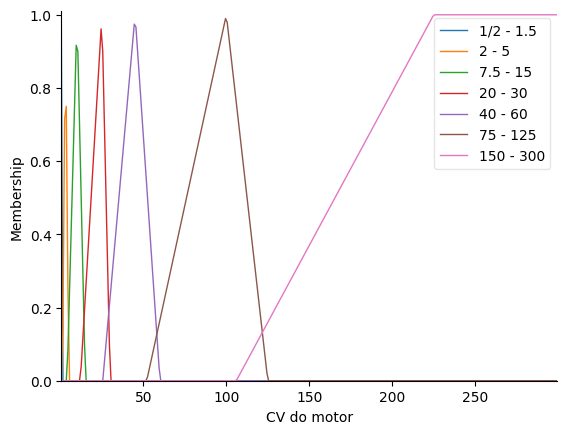

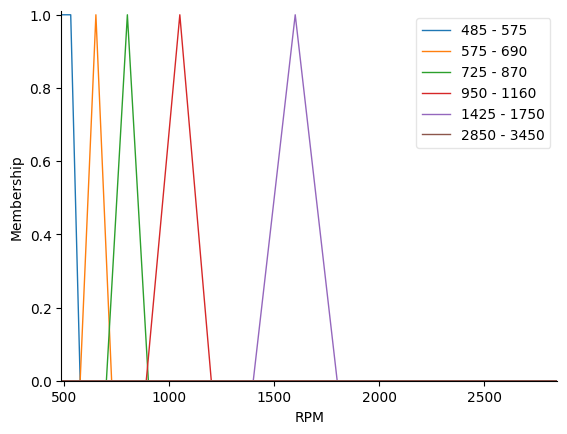

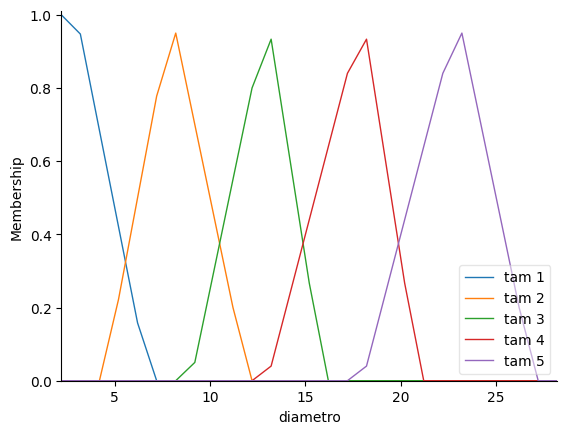

In [12]:

# Criando as variáveis do problema
CVmotor = ctrl.Antecedent(np.arange(1/2, 300, 1), 'CV do motor')
RPM = ctrl.Antecedent(np.arange(485, 2850, 1), 'RPM')
diametro = ctrl.Consequent(np.arange(2.2, 29, 1), 'diametro')

# Criando as funções de pertinência para o serviço
CVmotor['1/2 - 1.5'] = fuzz.trapmf(CVmotor.universe, [1/2, 1/2, 1, 1.5])
CVmotor['2 - 5'] = fuzz.trimf(CVmotor.universe, [1.25, 3, 5])
CVmotor['7.5 - 15'] = fuzz.trimf(CVmotor.universe, [4, 10, 15])
CVmotor['20 - 30'] = fuzz.trimf(CVmotor.universe, [12, 25, 30])
CVmotor['40 - 60'] = fuzz.trimf(CVmotor.universe, [25.5, 45, 60])
CVmotor['75 - 125'] = fuzz.trimf(CVmotor.universe, [52, 100, 125])
CVmotor['150 - 300'] = fuzz.trapmf(CVmotor.universe, [106, 225,300, 300])

# Criando as funções de pertinência para a maquina
RPM['485 - 575'] = fuzz.trapmf(RPM.universe, [485, 485 ,530 ,575])
RPM['575 - 690'] = fuzz.trimf(RPM.universe, [575,650,725]  )
RPM['725 - 870'] = fuzz.trimf(RPM.universe, [700,800,900] )
RPM['950 - 1160'] = fuzz.trimf(RPM.universe, [890,1050,1200] )
RPM['1425 - 1750'] = fuzz.trimf(RPM.universe, [1400,1600,1800] )
RPM['2850 - 3450'] = fuzz.trapmf(RPM.universe, [2850,3000,3450,3450])

# Criando as funções de pertinência para o serviço
diametro['tam 1'] = fuzz.trapmf(diametro.universe, [0, 0, 3, 6.8])
diametro['tam 2'] = fuzz.trimf(diametro.universe, [4.4, 8 ,12])
diametro['tam 3'] = fuzz.trimf(diametro.universe, [9, 13, 16])
diametro['tam 4'] = fuzz.trimf(diametro.universe, [13, 18, 21])
diametro['tam 5'] = fuzz.trimf(diametro.universe, [18, 23, 27])



CVmotor.view()
RPM.view()
diametro.view()

Digite o CVmotor: 50
Digite o RPM: 700
O diâmetro é de 8.165784 


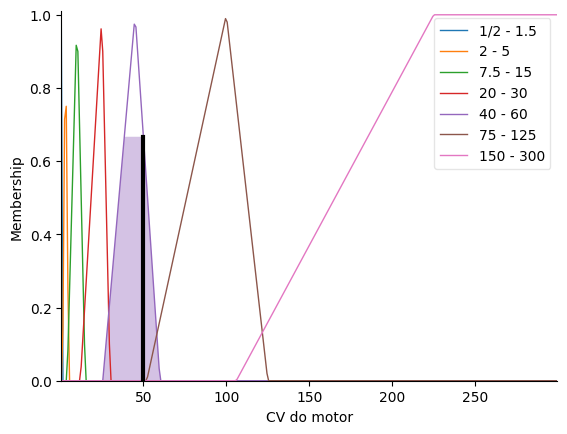

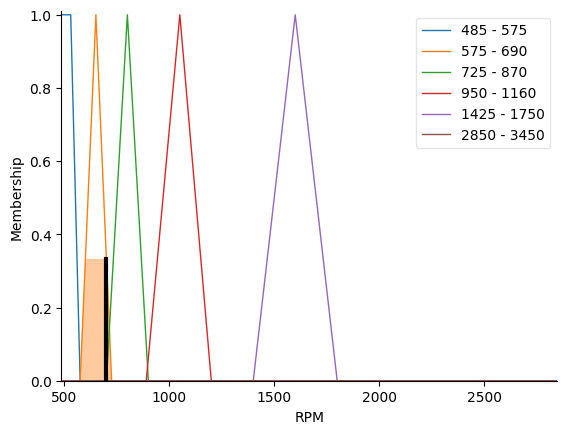

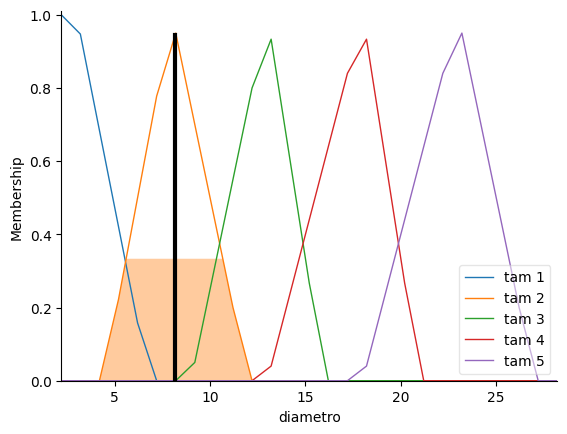

In [14]:
# Base de Regras
rule1 = ctrl.Rule(CVmotor['1/2 - 1.5'] & RPM['485 - 575'], diametro['tam 1'])
rule2 = ctrl.Rule(CVmotor['1/2 - 1.5'] & RPM['575 - 690'], diametro['tam 1'])
rule4 = ctrl.Rule(CVmotor['1/2 - 1.5'] & RPM['725 - 870'], diametro['tam 1'])
rule5 = ctrl.Rule(CVmotor['1/2 - 1.5'] & RPM['950 - 1160'], diametro['tam 1'])
rule6 = ctrl.Rule(CVmotor['1/2 - 1.5'] & RPM['1425 - 1750'], diametro['tam 1'])
rule7 = ctrl.Rule(CVmotor['1/2 - 1.5'] & RPM['2850 - 3450'], diametro['tam 1'])

rule8 = ctrl.Rule(CVmotor['2 - 5'] & RPM['485 - 575'], diametro['tam 1'])
rule9 = ctrl.Rule(CVmotor['2 - 5'] & RPM['575 - 690'], diametro['tam 1'])
rule10 = ctrl.Rule(CVmotor['2 - 5'] & RPM['575 - 690'], diametro['tam 1'])
rule11 = ctrl.Rule(CVmotor['2 - 5'] & RPM['725 - 870'], diametro['tam 1'])
rule12 = ctrl.Rule(CVmotor['2 - 5'] & RPM['950 - 1160'], diametro['tam 1'])
rule13 = ctrl.Rule(CVmotor['2 - 5'] & RPM['1425 - 1750'], diametro['tam 1'])
rule14 = ctrl.Rule(CVmotor['2 - 5'] & RPM['2850 - 3450'], diametro['tam 1'])

rule15 = ctrl.Rule(CVmotor['7.5 - 15'] & RPM['485 - 575'], diametro['tam 1'])
rule16 = ctrl.Rule(CVmotor['7.5 - 15'] & RPM['575 - 690'], diametro['tam 1'])
rule17 = ctrl.Rule(CVmotor['7.5 - 15'] & RPM['575 - 690'], diametro['tam 1'])
rule18 = ctrl.Rule(CVmotor['7.5 - 15'] & RPM['725 - 870'], diametro['tam 1'])
rule19 = ctrl.Rule(CVmotor['7.5 - 15'] & RPM['950 - 1160'], diametro['tam 1'])
rule20 = ctrl.Rule(CVmotor['7.5 - 15'] & RPM['1425 - 1750'], diametro['tam 1'])
rule21 = ctrl.Rule(CVmotor['7.5 - 15'] & RPM['2850 - 3450'], diametro['tam 1'])

rule22 = ctrl.Rule(CVmotor['20 - 30'] & RPM['485 - 575'], diametro['tam 2'])
rule23 = ctrl.Rule(CVmotor['20 - 30'] & RPM['575 - 690'], diametro['tam 2'])
rule24 = ctrl.Rule(CVmotor['20 - 30'] & RPM['575 - 690'], diametro['tam 2'])
rule25 = ctrl.Rule(CVmotor['20 - 30'] & RPM['725 - 870'], diametro['tam 2'])
rule26 = ctrl.Rule(CVmotor['20 - 30'] & RPM['950 - 1160'], diametro['tam 2'])
rule27 = ctrl.Rule(CVmotor['20 - 30'] & RPM['1425 - 1750'], diametro['tam 2'])
rule28 = ctrl.Rule(CVmotor['20 - 30'] & RPM['2850 - 3450'], diametro['tam 2'])

rule29 = ctrl.Rule(CVmotor['40 - 60'] & RPM['485 - 575'], diametro['tam 2'])
rule30 = ctrl.Rule(CVmotor['40 - 60'] & RPM['575 - 690'], diametro['tam 2'])
rule31 = ctrl.Rule(CVmotor['40 - 60'] & RPM['575 - 690'], diametro['tam 2'])
rule32 = ctrl.Rule(CVmotor['40 - 60'] & RPM['725 - 870'], diametro['tam 2'])
rule33 = ctrl.Rule(CVmotor['40 - 60'] & RPM['950 - 1160'], diametro['tam 2'])
rule34 = ctrl.Rule(CVmotor['40 - 60'] & RPM['1425 - 1750'], diametro['tam 2'])
rule35 = ctrl.Rule(CVmotor['40 - 60'] & RPM['2850 - 3450'], diametro['tam 2'])

rule36 = ctrl.Rule(CVmotor['75 - 125'] & RPM['485 - 575'], diametro['tam 4'])
rule37 = ctrl.Rule(CVmotor['75 - 125'] & RPM['575 - 690'], diametro['tam 4'])
rule38 = ctrl.Rule(CVmotor['75 - 125'] & RPM['575 - 690'], diametro['tam 4'])
rule39 = ctrl.Rule(CVmotor['75 - 125'] & RPM['725 - 870'], diametro['tam 3'])
rule40 = ctrl.Rule(CVmotor['75 - 125'] & RPM['950 - 1160'], diametro['tam 3'])
rule41 = ctrl.Rule(CVmotor['75 - 125'] & RPM['1425 - 1750'], diametro['tam 3'])
rule42 = ctrl.Rule(CVmotor['75 - 125'] & RPM['2850 - 3450'], diametro['tam 3'])

rule43 = ctrl.Rule(CVmotor['150 - 300'] & RPM['485 - 575'], diametro['tam 5'])
rule44 = ctrl.Rule(CVmotor['150 - 300'] & RPM['575 - 690'], diametro['tam 5'])
rule45 = ctrl.Rule(CVmotor['150 - 300'] & RPM['575 - 690'], diametro['tam 5'])
rule46 = ctrl.Rule(CVmotor['150 - 300'] & RPM['725 - 870'], diametro['tam 5'])
rule47 = ctrl.Rule(CVmotor['150 - 300'] & RPM['950 - 1160'], diametro['tam 4'])
rule48 = ctrl.Rule(CVmotor['150 - 300'] & RPM['1425 - 1750'], diametro['tam 4'])


# Sistema Fuzzy e Simulação
validade_ctrl  = ctrl.ControlSystem([rule1,rule11,rule21,rule31,rule41,
                                     rule2,rule12,rule22,rule32,rule42,
                                     rule13,rule23,rule33,rule43,
                                     rule4,rule14,rule24,rule34,rule44,
                                     rule5,rule15,rule25,rule35,rule45,
                                     rule6,rule16,rule26,rule36,rule46,
                                     rule7,rule17,rule27,rule37,rule47,
                                     rule8,rule18,rule28,rule38,rule48,
                                     rule9,rule19,rule29,rule39,
                                     rule10,rule20,rule30,rule40,])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

# Entranda do CVmotor
while True:
  serv = float(input('Digite o CVmotor: '))
  if(serv<1/2 or serv >300):
    print('O CV do motor [1/2, 300]')
    continue
  validade_simulador.input['CV do motor'] = serv
  break

# Entrada do RPM
while True:
  ur = float(input('Digite o RPM: '))
  if(ur<485 or ur >2850):
    print('O RPM deve estar no intervalo de  [485,2850]')
    continue
  validade_simulador.input['RPM'] = ur
  break


# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()
print('O diâmetro é de %f ' % float(validade_simulador.output['diametro']))

# Visualizando as regiões
CVmotor.view(sim=validade_simulador)
RPM.view(sim=validade_simulador)
diametro.view(sim=validade_simulador)